# Математика для экономистов 

В этом курсе вы узнаете, как

1) Работать с выпуклыми задачами

2) Решать детерминированные и стохастические задачи динамического программирования

3) Уметь применять данные в курсе методы для решения экономических задач

# Markovitz model

In [129]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns 
import matplotlib.pyplot as plt

In [130]:
#Возьмем 10 самых популярных бумаг из S&P 500
stocks = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOG', 'META', 'BRK-B', 'TSLA', 'UNH', 'LLY']
df = yf.download(stocks, '2013-01-01', '2023-05-31')

[*********************100%***********************]  10 of 10 completed


In [131]:
data = df['Adj Close'].resample('M').ffill().pct_change()
data = data.dropna(axis = 0, how = 'all')
data.head()

,AAPL,AMZN,BRK-B,GOOG,LLY,META,MSFT,NVDA,TSLA,UNH
Date,,,,,,,,,,
2013-02-28,-0.025286,-0.004633,0.053956,0.060223,0.027424,-0.120400,0.021135,0.038961,-0.071448,-0.031878
2013-03-31,0.002855,0.008401,0.019969,-0.008749,0.038968,-0.061284,0.029137,0.013428,0.087855,0.074501
2013-04-30,0.000271,-0.047582,0.020346,0.038253,-0.024829,0.085614,0.156938,0.073266,0.424914,0.047544
2013-05-31,0.022420,0.060636,0.072893,0.056575,-0.031656,-0.123154,0.061774,0.056173,0.810706,0.045053
2013-06-30,-0.118293,0.031538,-0.018848,0.010503,-0.075997,0.021766,-0.010315,-0.029717,0.098200,0.050112


In [132]:
e = np.ones((10,))
R = np.round(np.asarray(data.mean()),4)

In [133]:
V = np.asarray(data.cov())
V_inv = np.linalg.inv(V)
print(np.linalg.det(V @ V_inv))

0.9999999999999996


In [134]:
A = R.T @ V_inv @ R 
B = e.T @ V_inv @ R
C = e.T @ V_inv @ e
D = A * C - B**2

In [136]:
1 / C ** 0.5

0.036789948704212566

In [138]:
R_limit = B / C
(1 + R_limit) ** 12 - 1

0.20284477250913313

In [135]:
def calculate_sigma(A, B, C, D): 
    x_min = -0.05
    x_max = 0.08
    period = 1000
    X = np.linspace(x_min, x_max, period)
    sigma = list()
    for x in X: 
        ans = C / D * ((x - B / C) ** 2) + 1 / C
        ans = ans ** 0.5
        sigma.append(ans)
    sigma = np.asarray(sigma)
    return (X, sigma)

In [139]:
R_p, Sigma = calculate_sigma(A, B, C, D)

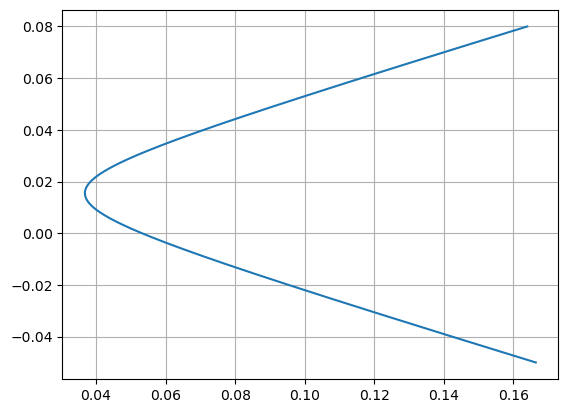

In [140]:
plt.figure()
#sns.scatterplot(x = Sigma, y = R_p, sizes = (5,5))
plt.plot(Sigma, R_p)
plt.grid()
plt.show()

In [141]:
#Сформируем случайные портфели
limit = 100000
R_random = list()
Sigma_random = list()


for i in range(limit): 
    X = np.random.normal(size = (10,))
    try: 
        X = X / X.sum()
        R_random.append(X.T @ R)
        Sigma_random.append((X.T @ V @ X) ** 0.5)
    except: 
        pass
    
to_data = {}
to_data['Return'] = R_random
to_data['Volatility'] = Sigma_random
random_data = pd.DataFrame(to_data)

In [142]:
random_data = random_data[random_data['Volatility'] < 0.15]

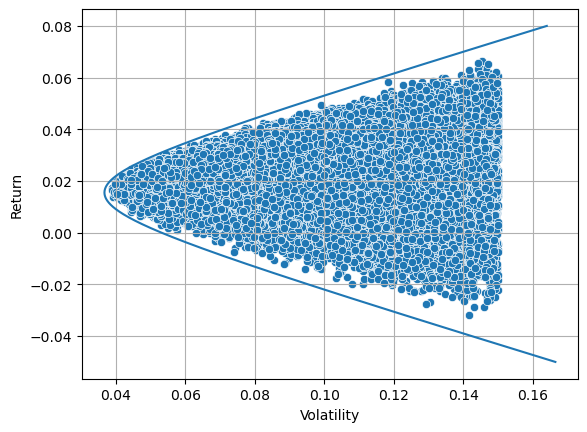

In [143]:
plt.figure()
plt.plot(Sigma, R_p)
sns.scatterplot(x = random_data['Volatility'], y = random_data['Return'])
plt.grid()
plt.show()